# 닮은 꼴 연예인 찾기


## 루브릭

1.얼굴임베딩 벡터를 활용해 가장 닮은 연예인 best 5를 구할 수 있다.
 - 닮은 꼴 순위, 이름, 임베딩 거리를 포함한 top-5리스트가 출력되었다.

2.충분한 수의 이미지에 대한 시도를 통해 매우 닮은 꼴의 연예인을 찾아냈다.
 - 다양한 탐색을 통해 본인과 임베딩 거리 0.5이내로 닮은 연예인을 찾아냈다.
 
3.다양하고 재밌있는 결과 시각화를 시도하였다.
 - matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재밌있는 결과 시각화를 구현하였다.
 

In [278]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import numpy as np
import pandas as pd


dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
file_list = os.listdir(dir_path)
print(len(file_list))


185


In [279]:
#얼굴 사진 자르기 메소드 정의
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face    

In [280]:
#얼굴 사진 잘라보기
image_file = os.path.join(dir_path, 'me1.png')
face = get_cropped_face(image_file)  

In [281]:
#얼굴 임베딩 벡터 구하는 메소드 정의
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [282]:
#임베딩 벡터 메소드 실행 테스트
image_file = os.path.join(dir_path, 'me1.png')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)


In [283]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [284]:
#임베딩 계산 실행
embedding = get_face_embedding(face)  
embedding

[array([-1.02319442e-01,  1.15813084e-01,  2.13384349e-02, -1.14209987e-02,
        -9.67840105e-02,  1.55562069e-03, -5.73204458e-02, -1.39144361e-01,
         9.83506888e-02, -1.26612142e-01,  2.08135322e-01, -8.24649632e-02,
        -2.08371729e-01, -8.93107206e-02, -3.40029448e-02,  1.80139661e-01,
        -1.16483413e-01, -1.45360768e-01, -3.27901319e-02,  4.36923355e-02,
         1.78156480e-01,  2.16612034e-02, -2.43015937e-04,  5.19728176e-02,
        -1.31715894e-01, -3.28723550e-01, -1.24603227e-01, -4.79905270e-02,
        -2.64875293e-02, -4.79765199e-02, -9.57336426e-02,  2.02136654e-02,
        -1.98594838e-01, -4.14377078e-02,  9.86390747e-04,  1.10383093e-01,
        -8.38049129e-03, -7.30223581e-02,  1.31364331e-01, -3.34298871e-02,
        -2.80992746e-01,  5.66749424e-02,  6.33878559e-02,  2.33376503e-01,
         2.00802043e-01, -3.31065082e-03,  8.09626281e-03, -9.84936804e-02,
         9.61028337e-02, -2.00385571e-01,  7.89596885e-02,  1.24187686e-01,
         7.2

In [285]:
#얼굴 임베딩 딕셔너리 저장 메소드
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    print(len(embedding_dict))    
    return embedding_dict

In [287]:
#임베딩 저장 실행
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['me1']

183


array([-1.02319442e-01,  1.15813084e-01,  2.13384349e-02, -1.14209987e-02,
       -9.67840105e-02,  1.55562069e-03, -5.73204458e-02, -1.39144361e-01,
        9.83506888e-02, -1.26612142e-01,  2.08135322e-01, -8.24649632e-02,
       -2.08371729e-01, -8.93107206e-02, -3.40029448e-02,  1.80139661e-01,
       -1.16483413e-01, -1.45360768e-01, -3.27901319e-02,  4.36923355e-02,
        1.78156480e-01,  2.16612034e-02, -2.43015937e-04,  5.19728176e-02,
       -1.31715894e-01, -3.28723550e-01, -1.24603227e-01, -4.79905270e-02,
       -2.64875293e-02, -4.79765199e-02, -9.57336426e-02,  2.02136654e-02,
       -1.98594838e-01, -4.14377078e-02,  9.86390747e-04,  1.10383093e-01,
       -8.38049129e-03, -7.30223581e-02,  1.31364331e-01, -3.34298871e-02,
       -2.80992746e-01,  5.66749424e-02,  6.33878559e-02,  2.33376503e-01,
        2.00802043e-01, -3.31065082e-03,  8.09626281e-03, -9.84936804e-02,
        9.61028337e-02, -2.00385571e-01,  7.89596885e-02,  1.24187686e-01,
        7.29740188e-02,  

In [288]:
#거리 구하는 메소드 L2로 정의
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me1','me2')#내 사진으로 비교

0.3372247521430368

In [289]:
#top5 선정하기 메소드 정의
def get_nearest_face(name, top=5): 
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    dic = dict()
    for i in range(top+1):
        
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            dic[sorted_faces[i][0]]= sort_key_func(sorted_faces[i][0])
    return dic
    

In [290]:
# # name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [294]:
#나와 닮은 이미지 top5
top5=get_nearest_face('me2')

순위 1 : 이름(me1), 거리(0.3372247521430368)
순위 2 : 이름(이대형), 거리(0.40171453430962023)
순위 3 : 이름(유지태), 거리(0.42622056742313963)
순위 4 : 이름(김현수), 거리(0.43132338509773505)
순위 5 : 이름(수호), 거리(0.43242682887881456)


{'me1': 0.3372247521430368, '이대형': 0.40171453430962023, '유지태': 0.42622056742313963, '김현수': 0.43132338509773505, '수호': 0.43242682887881456}


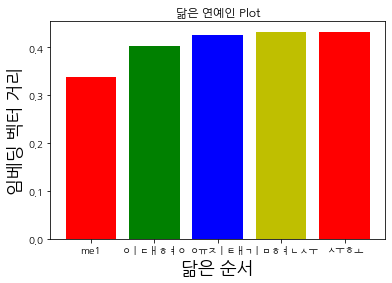

In [295]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family = "NanumGothic")
plt.rc('axes', unicode_minus=False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print(top5)
dict_df = pd.DataFrame(top5,index=["거리"])
dict_df

x=top5.keys()
y=top5.values()

plt.figure().add_subplot().set_title('닮은 연예인 Plot')
plt.xlabel('닮은 순서', fontsize=18)
plt.ylabel('임베딩 벡터 거리', fontsize=18)
plt.bar(x, y,color=['r','g','b','y'])
plt.show()


**정리**
이미지 간의 유사도는 임베딩 벡터의 차이에 반비례한다는 사실을 알았다.
그 차이로 차이가 적은 순으로 나와 닮은 베스트5를 뽑았는데, 역시나 또 다른 나의 사진을 가장 닮은 꼴로 뽑았다. 나머지 값들은 데이터가 적어서 의외의 결과였지만, 다른 환경에서의 나의 사진을 우선으로 뽑았다는 것에 모델이 제대로 작동하고 있음을 확인했다. top5의 사진 모두 내 사진과 벡터 거리 0.5이내의 차이를 보였다.